In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
rrank = lambda df,k: df[np.isclose(df['mrr'], 1/k)]
equal = lambda df,k: df[np.isclose(df['mrr'], 1/k)]
gequal = lambda df,k: df[np.isclose(df['mrr'], 1/k) | (df['mrr'].ge(1/k))]

In [15]:
all = pd.read_csv('/data/khodadaa/lucene-index/rranks.csv', header=None)
sub = pd.read_csv('/data/khodadaa/lucene-index/rr/05092047_sub2_rranks.csv', header=None)
all.rename(columns={0:'query', 1: 'prec@10', 2: 'prec@20', 3: 'mrr', 4: 'avg(prec)', 5: 'recall@200', 6: 'recall@1000', 7:'ndcg10'}, inplace=True)
sub.rename(columns={0:'query', 1: 'prec@10', 2: 'prec@20', 3: 'mrr', 4: 'avg(prec)', 5: 'recall@200', 6: 'recall@1000', 7:'ndcg10'}, inplace=True)

query_assignment = pd.read_csv('/data/khodadaa/lucene-index/query-assignments/05092047_query_assignment.csv', header=None)
query_assignment.rename(columns={0: 'query', 1:'assignment'}, inplace=True)

In [ ]:
a1 = equal(all, 1)
s1 = equal(sub, 1)
a2 = gequal(all, 2)
s2 = gequal(sub, 2)
tran1_sub = sub[sub['query'].isin(a1['query'])]
tran2_sub = sub[sub['query'].isin(a2['query'])]

<Figure size 432x288 with 0 Axes>

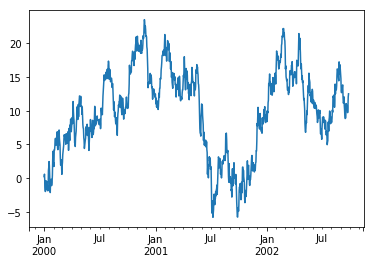

<Figure size 432x288 with 0 Axes>

In [11]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()
plt.figure()